### MNIST 데이터셋 분석
- 2024/03/04 과제
- 데이터 : 손으로 쓴 70000개의 작은 숫자 이미지 (28x28)
- 학습방법 : 지도학습

(1) 데이터 준비

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)   # sklearn.utils._bunch.Bunch

C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(2) 데이터 전처리 [skip]

(3) 학습을 위한 데이터 준비

In [3]:
# data   : 입력 데이터 (일반적으로 2D 넘파이 배열)
# target : 레이블      (일반적으로 1D 넘파이 배열)
x, y = mnist.data, mnist.target

In [4]:
type(x), x.shape

(numpy.ndarray, (70000, 784))

In [5]:
type(y), y.shape

(numpy.ndarray, (70000,))

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')    # cmap='binary' => 흑백(greyscale)컬러맵
    plt.axis('off')
    plt.show()

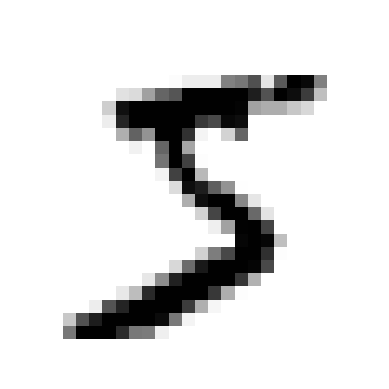

In [7]:
some_digit = x[0]   # (784,)
plot_digit(some_digit)

In [8]:
# 학습/테스트 데이터 분리
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [9]:
# Logistic Regression 에서 사용할 y값 숫자로 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y_arr = encoder.transform(y)
encoded_y_train, encoded_y_test = y[:60000], y[60000:]

In [10]:
encoded_y_train.shape, encoded_y_test.shape

((60000,), (10000,))

(4) 학습 진행

In [11]:
# (4-1) SGDClassifier 2진 분류기 (binary classifier)
from sklearn.linear_model import SGDClassifier

five_mask_train = (y_train == '5')
five_mask_test = (y_test == '5')

# 5인지 아닌지 구분하는 이진 분류기 (binary classifier) 생성
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(x_train, five_mask_train)

SGDClassifier(loss='log_loss', random_state=42)

In [12]:
# predict() 의 인수로 2D array 를 넘겨줘야 하기 때문에, 데이터가 1개더라도 2D array로 만든다.
sgd_clf.predict([some_digit])   # 5가 맞다고 추측 (감지 성공)

array([ True])

In [13]:
# (4-2) SGDClassifier 2진 분류기 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(five_mask_train, sgd_clf.predict(x_train))
precision = precision_score(five_mask_train, sgd_clf.predict(x_train))
recall = recall_score(five_mask_train, sgd_clf.predict(x_train))
f1 = f1_score(five_mask_train, sgd_clf.predict(x_train))

print(f'정확도 : {accuracy}')
print(f'정밀도 : {precision}')
print(f'재현율 : {recall}')
print(f'f1-score : {f1}')

정확도 : 0.9713833333333334
정밀도 : 0.8864774624373957
재현율 : 0.7836192584394023
f1-score : 0.831880936061882


In [14]:
# (4-3) SGDClassifier 성능 테스트
from PIL import Image
import numpy as np

def convert_png_to_1d_arr(filename):
    """
    이미지 파일 경로를 넘기면 이미지를 읽어서 1D ndarray (784,)로 변환하여 반환하는 함수
    :param filename: 이미지 파일 경로
    :return: 1D ndarray
    """
    # 이미지 열기
    image = Image.open(filename)
    
    # 이미지 사이즈 조정
    image = image.resize((28, 28))
    
    # 이미지를 grayscale로 변환
    grayscale_image = image.convert('L')
    
    # 이미지를 ndarray로 변환
    grayscale_array = np.array(grayscale_image)
    
    # 흑백 반전 (학습된 이미지는 글씨가 검은색)
    grayscale_array = abs(grayscale_array.astype("int") - 255)
    
    # 2D(28x28) ndarray를 1D ndarray로 변환하여 반환
    return grayscale_array.reshape(-1)

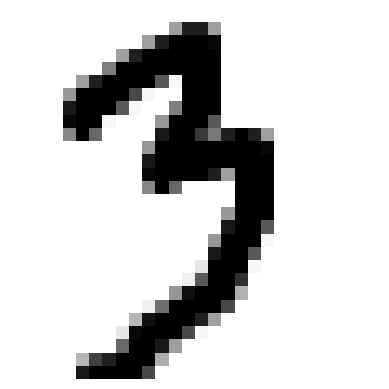

In [15]:
imagefile = 'three_01.png'
test_three = convert_png_to_1d_arr(imagefile)
plot_digit(test_three)

In [16]:
sgd_clf.predict([test_three])  # 5가 아니라고 예측 성공

array([False])

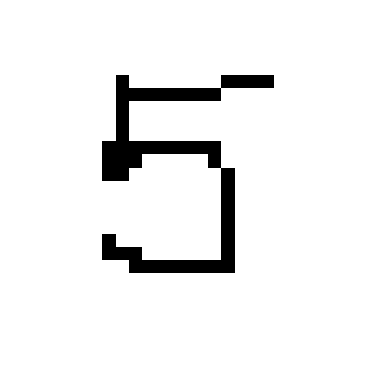

In [17]:
imagefile = 'five_03.png'
test_five = convert_png_to_1d_arr(imagefile)
plot_digit(test_five)

In [18]:
sgd_clf.predict([test_five])

array([ True])

In [19]:
sgd_clf.decision_function([test_five])

array([586.99344587])

In [20]:
import cv2
def convert_png_to_1d_arr2(filename):
    my_num = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # cv2.imshow("my_num", my_num)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    my_num = cv2.resize(my_num, (28, 28))
    
    my_num = my_num.ravel()
    my_num = abs(my_num.astype("int") - 255) # 이미지는 흰부분이 255라서 
    return my_num

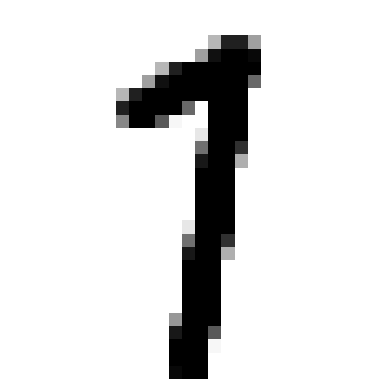

In [21]:
test_five = convert_png_to_1d_arr2('one_01.png')
plot_digit(test_five)

In [22]:
sgd_clf.predict([test_five])

array([False])

In [ ]:
# (4-4) Logistic Regression 다중 분류기
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300, solver='liblinear')
model.fit(x_train, encoded_y_train)

돌려도 돌려도 끝이 안 남... (30분 넘게 돌아가는 걸 보면 뭔가 잘못된 듯)